In [1]:
import pandas as pd
import numpy as np
import pandas as pd 
import re
import os
from datetime import datetime
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
import plotly.tools as tls
import plotly.plotly
from chart_studio.plotly import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
sns.set()


In [2]:
p = "YlGnBu"
p2 = "YlGn"
p3 = "Greys"

In [3]:
df=pd.read_excel("C:/Users/santo/Nyc jobs dataset/nyc-jobs.xlsx")
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-23T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-23T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-23T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-23T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-23T00:00:00.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 28 columns):
Job ID                           3028 non-null int64
Agency                           3028 non-null object
Posting Type                     3028 non-null object
# Of Positions                   3028 non-null int64
Business Title                   3028 non-null object
Civil Service Title              3028 non-null object
Title Code No                    3028 non-null object
Level                            3028 non-null object
Job Category                     3026 non-null object
Full-Time/Part-Time indicator    2779 non-null object
Salary Range From                3028 non-null float64
Salary Range To                  3028 non-null float64
Salary Frequency                 3028 non-null object
Work Location                    3028 non-null object
Division/Work Unit               3028 non-null object
Job Description                  3028 non-null object
Minimum Qual Requirements    

In [5]:
def plot_wordcloud(text):
    wordcloud = WordCloud(background_color='white',
                     width=1024, height=720).generate(text)
    plt.clf()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

def parse_categories(x):
    l = x.replace('&', ',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    key_categories.extend(l)

def parse_keywords(x, l):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    token_l = [w for w in tokens if not w in stop_words and w.isalpha()]
    l.extend(token_l)
    
def preferred_skills(x):
    kwl = []
    df[df.job_category==x].preferred_skills.dropna().apply(parse_keywords, l=kwl)
    kwl = pd.Series(kwl)
    return kwl.value_counts()[:20]

In [6]:
df.drop(['Recruitment Contact', 'Post Until'], axis=1, inplace=True)
df.columns = ['id', 'agency', 'posting_type', 'number_of_positions', 'business_title', 'civil_service_title', 'title_code_number', 'level', 'job_category', 'full-time/part-time', 'salary_range_low', 'salary_range_high', 'salary_frequency', 'work_location', 'work_unit', 'job_description', 'minimum_requirements', 'preferred_skills', 'additional_info', 'to_apply', 'shift', 'work_location_1', 'residency_requirement', 'posting_date', 'posting_updated', 'process_date' ]

df.job_category.value_counts()

In [7]:
key_categories = []
df.job_category.dropna().apply(parse_categories)
key_categories = pd.Series(key_categories)
key_categories = key_categories[key_categories!='']
popular_categories = key_categories.value_counts().iloc[:25]

# Majority In Full-time or Part-time

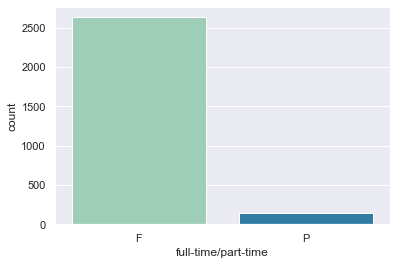

In [8]:
sns.countplot(x='full-time/part-time', data=df, palette=p)

# Salary Frequency

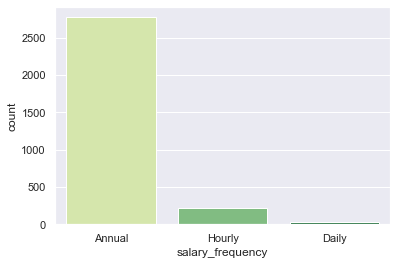

In [9]:
sns.countplot(x='salary_frequency', data=df, palette=p2)


# Most Job Categories

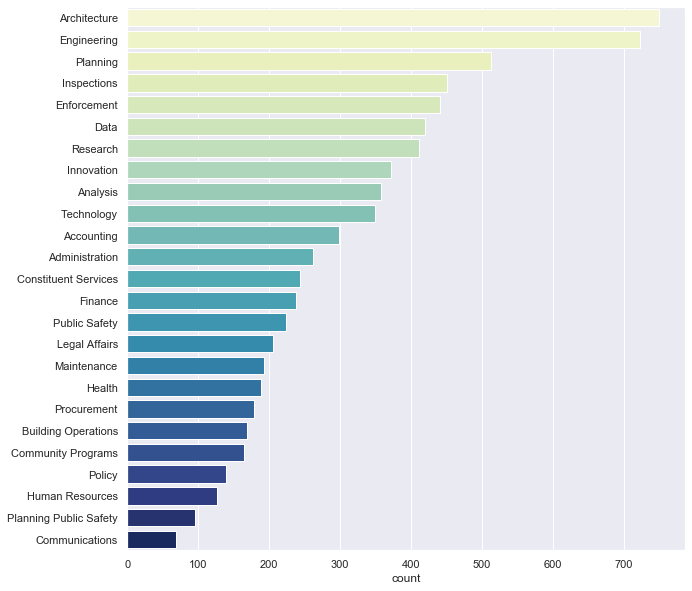

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(y=key_categories, order=popular_categories.index, palette=p)

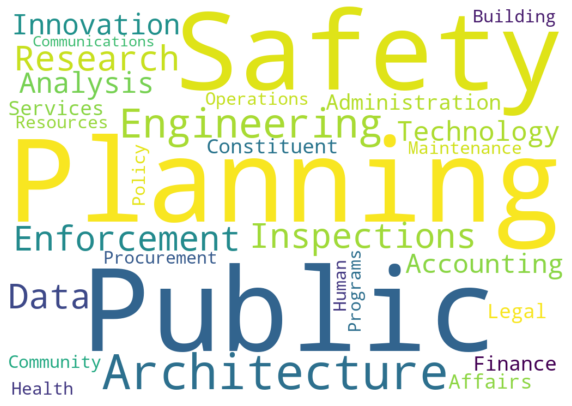

In [11]:
plt.figure(figsize=(10,8))
plot_wordcloud(' '.join(popular_categories.index.tolist()))


# Most popular job titles

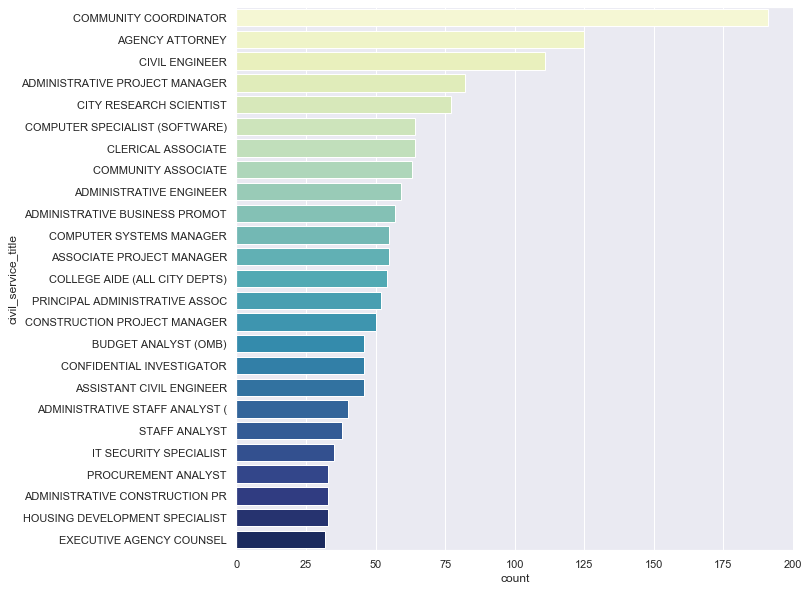

In [12]:
plt.figure(figsize=(10,10))
titles_freq = df.civil_service_title.value_counts()
popular_titles = titles_freq.iloc[:25]
sns.countplot(y="civil_service_title", data=df, order=popular_titles.index, palette=p)

# Least popular job titles

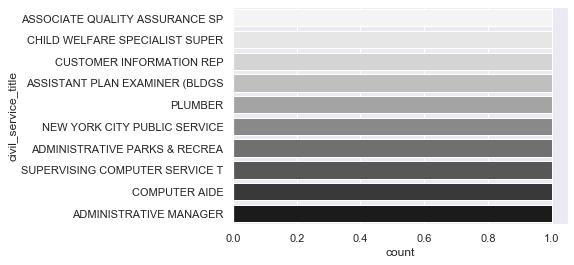

In [13]:
least_popular = titles_freq.iloc[-10:]
sns.countplot(y="civil_service_title", data=df, order=least_popular.index, palette=p3)

# Job with highest low salary range

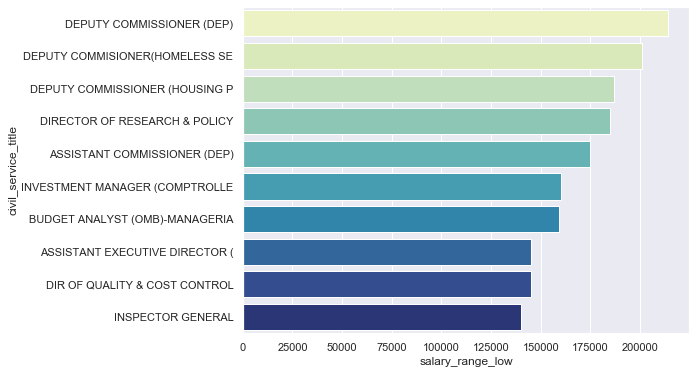

In [14]:
salary_table = df[['civil_service_title', 'salary_range_low', 'salary_range_high']]
jobs_highest_low_range = pd.DataFrame(salary_table.groupby(['civil_service_title'])['salary_range_low'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_low', data=jobs_highest_low_range, palette=p)

# Jobs with highest salary range 

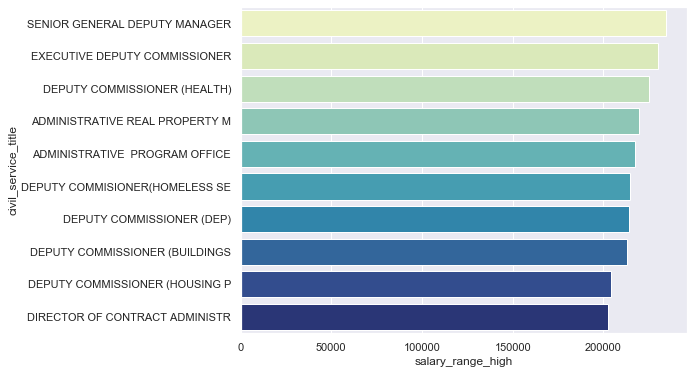

In [15]:
jobs_highest_high_range = pd.DataFrame(salary_table.groupby(['civil_service_title'])['salary_range_high'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_high', data=jobs_highest_high_range, palette=p)

# Highest paying jobs on hourly bases

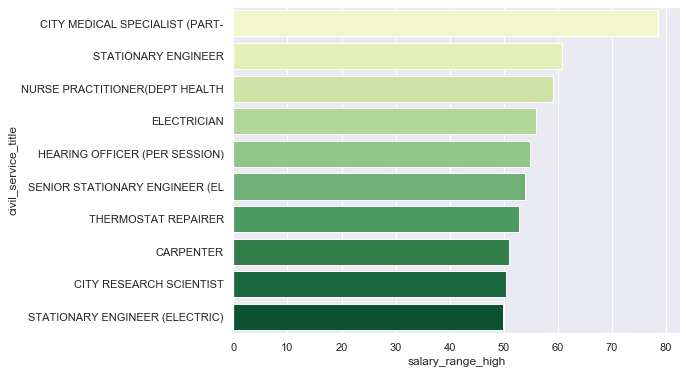

In [16]:
hourly_jobs = df[df.salary_frequency == 'Hourly']
jobs_highest_high_range_hourly = pd.DataFrame(hourly_jobs.groupby(['civil_service_title'])['salary_range_high'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_high', data=jobs_highest_high_range_hourly, palette=p2)

# Hourly jobs salary distrubution

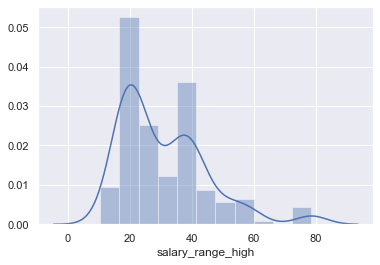

In [17]:
sns.distplot(hourly_jobs.salary_range_high)

# Popular working units

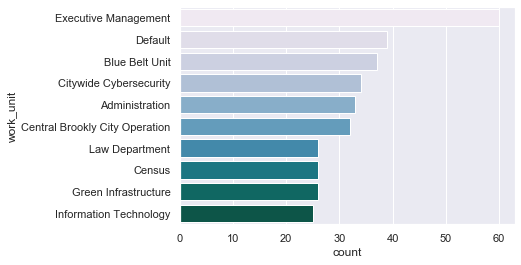

In [18]:
popular_divisions = df.work_unit.value_counts().iloc[:10]
sns.countplot(y='work_unit', data=df, order=popular_divisions.index, palette='PuBuGn')

# Most popular preferred skills per job category

In [19]:
popular_categories = df.job_category.value_counts()[:5]
popular_categories

Engineering, Architecture, & Planning        510
Technology, Data & Innovation                323
Public Safety, Inspections, & Enforcement    223
Legal Affairs                                206
Health                                       189
Name: job_category, dtype: int64

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
preferred_skills(popular_categories.index[0]).iplot(title='engineering', kind='bar', color='khaki')

In [22]:
preferred_skills(popular_categories.index[1]).iplot(title='technology', kind='bar', color='deepskyblue')

In [23]:
preferred_skills(popular_categories.index[2]).iplot(title='public safety', kind='bar', color='green')

In [24]:
preferred_skills(popular_categories.index[3]).iplot(title='health', kind='bar', color='powderblue')

In [25]:
preferred_skills(popular_categories.index[4]).iplot(title='legal affairs', kind='bar', color='darkolivegreen')
